IRIS Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Iris.csv
database.sqlite



List Of All Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data = pd.read_csv("../input/Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


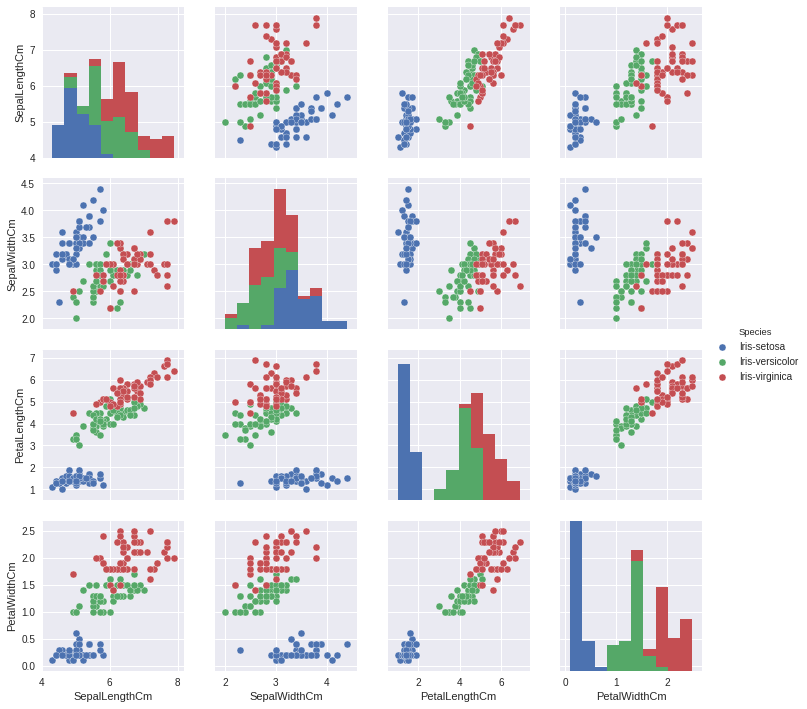

In [7]:
sns.pairplot(data.drop("Id", axis=1), hue="Species")

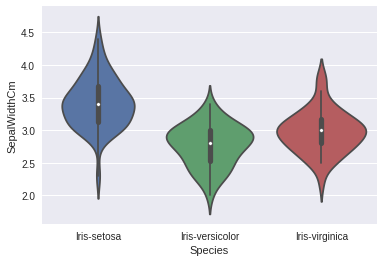

In [8]:
sns.violinplot(x="Species", y="SepalWidthCm", data=data.drop("Id",axis=1), size=6)

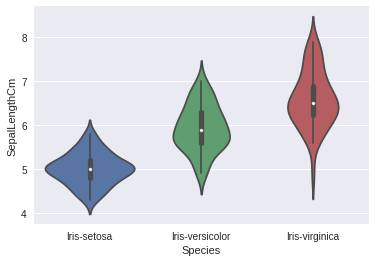

In [9]:
sns.violinplot(x="Species", y="SepalLengthCm", data=data.drop("Id",axis=1), size=6)

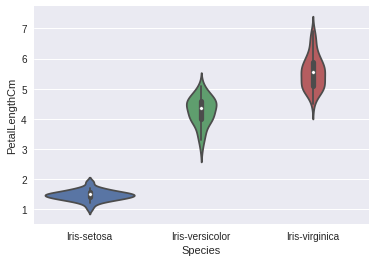

In [10]:
sns.violinplot(x="Species", y="PetalLengthCm", data=data.drop("Id",axis=1), size=6)

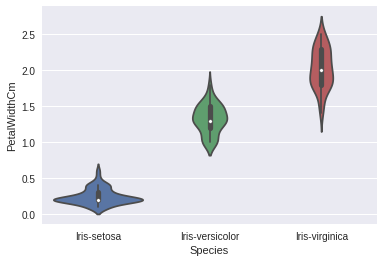

In [11]:
sns.violinplot(x="Species", y="PetalWidthCm", data=data.drop("Id",axis=1), size=6)

In [12]:
y = data["Species"]
X = data.drop(["Id", "Species"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Now, We check  C over a range of values to find the Highest accuracy_score.

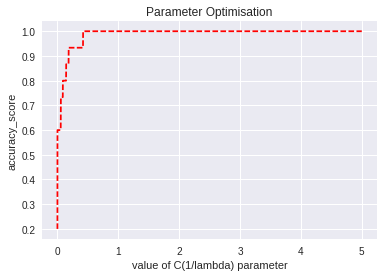

In [13]:
c = 0.001
score = []
c_value = []
while(c<= 5):
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score.append(accuracy_score(y_test, pred))
    c_value.append(c)
    c += 0.001
    
plt.plot(c_value, score,'r--')
plt.xlabel("value of C(1/lambda) parameter")
plt.ylabel("accuracy_score")
plt.title("Parameter Optimisation")
plt.show()
    

Similarly test over a range of values for n(n_neighbors) to find highest accuracy_score

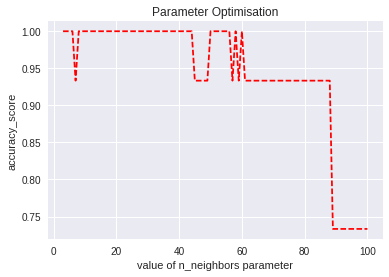

In [14]:
n = 3
score = []
n_value = []
while(n <= 100):
    model1 = KNeighborsClassifier(n_neighbors=n)
    model1.fit(X_train, y_train)
    pred1 = model1.predict(X_test)
    score.append(accuracy_score(y_test, pred1))
    n_value.append(n)
    n += 1
  
plt.plot(n_value, score,'r--')
plt.xlabel("value of n_neighbors parameter")
plt.ylabel("accuracy_score")
plt.title("Parameter Optimisation")
plt.show()

Also when using a SVC with kernel as "rbf" we have to optimise two parameters C and gamma. Now consider a interval for both variables and look where they produce the highest Accuracy_score. 

In [18]:
maxi = 0
c = 0.01
g = 0.01
while (c <= 5):
    while(g <= 5):
        model = SVC(C=c, gamma=g)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score = accuracy_score(y_test, pred)
        if score > maxi:
            max_gamma = g
            max_c = c
            maxi = score
        g += 0.1        
    c += 0.1
    g = 0.01

print("Max C: ", str(max_c), "max Gamma: ", str(max_gamma), "Max Accuracy score: ", str(maxi))

Max C:  0.11 max Gamma:  0.11 Max Accuracy score:  1.0


Here since, our data is small and all the labels are almost seperate, even less number of trees in a forest is able to give good accuracy.

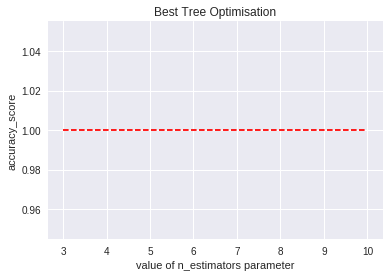

In [26]:
n = 3
score = []
n_value = []
while(n <= 10):
    model1 = RandomForestClassifier(n_estimators=n)
    model1.fit(X_train, y_train)
    pred1 = model1.predict(X_test)
    score.append(accuracy_score(y_test, pred1))
    n_value.append(n)
    n += 1
  
plt.plot(n_value, score,'r--')
plt.xlabel("value of n_estimators parameter")
plt.ylabel("accuracy_score")
plt.title("Best Tree Optimisation")
plt.show()

In [28]:
models = {"LogisticRegression" : LogisticRegression(C=2), "KNeighborClassifier": KNeighborsClassifier(n_neighbors=20), "SVC": SVC(C=0.11,gamma=0.11), "DecisionTreeClssifier": DecisionTreeClassifier(), "RandomForestClassifier": RandomForestClassifier()}
for name, model in models.items():
    print(name)
    print("\t")
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("Confusion matrix: ", confusion_matrix(y_test, pred))
    print("\n")
    

LogisticRegression
	
Accuracy Score:  1.0
Confusion matrix:  [[6 0 0]
 [0 6 0]
 [0 0 3]]


KNeighborClassifier
	
Accuracy Score:  1.0
Confusion matrix:  [[6 0 0]
 [0 6 0]
 [0 0 3]]


SVC
	
Accuracy Score:  1.0
Confusion matrix:  [[6 0 0]
 [0 6 0]
 [0 0 3]]


DecisionTreeClssifier
	
Accuracy Score:  1.0
Confusion matrix:  [[6 0 0]
 [0 6 0]
 [0 0 3]]


RandomForestClassifier
	
Accuracy Score:  1.0
Confusion matrix:  [[6 0 0]
 [0 6 0]
 [0 0 3]]


